<a href="https://colab.research.google.com/github/frnunez/COVID-19/blob/master/ApptPlus_Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APPOINTMENT PLUS CODE REPORT

## Libraries/Setup

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
import dateutil
import datetime

In [2]:
# graphing/plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data
Must download the data from appt+ and save as a csv file first

In [3]:
#!pwd

#ls

# uploaded needed files
# need to save downloaded file as a csv first before uploading
from google.colab import files
uploaded = files.upload()

Saving appointplus182-911-162677a.xls.csv to appointplus182-911-162677a.xls.csv


In [4]:
#apptplus = /content/appointplus182-911-162677a.xls
apdata = pd.read_csv("/content/appointplus182-911-162677a.xls.csv")
apptplus = apdata
apptplus.info

<bound method DataFrame.info of                                          Account  ...                                     Customer Notes
0   New York City Department of Consumer Affairs  ...                                                NaN
1   New York City Department of Consumer Affairs  ...                                                NaN
2   New York City Department of Consumer Affairs  ...  6/9/2021 TFSE told Queens location told applic...
3   New York City Department of Consumer Affairs  ...  5/26/2021 applicant coming to taking fpf and e...
4   New York City Department of Consumer Affairs  ...                                                NaN
..                                           ...  ...                                                ...
88  New York City Department of Consumer Affairs  ...  6/4/2021 Applicant getting re fingerprinted ap...
89  New York City Department of Consumer Affairs  ...                                   2/1/2021 New H25
90  New York City Depar

In [5]:
apptplus.head()

,Account,Customer Name,Primary/Cell Phone (format: xxx-xxx-xxxx),Email,Expeditor/Attorney/HiredProfessional?,Appointment Date,Duration,Start Time,Service,Staff / Location (screen name),Appointment Status,Created By,Appointment Notes (internal),Appointment Notes (to/from Customer),Customer Notes
0,New York City Department of Consumer Affairs,Carmen Napier,9172095226,Cameron148@aol.com,Not Expeditor,6/15/2021,30 minutes,8:00am,Applying for License,Queens,Confirmed,Candice,Applying for a TSFE. must have ss card and pho...,NaN,NaN
1,New York City Department of Consumer Affairs,Mitchell Greenblatt,201-401-7373,mtg072@aol.com,Not Expeditor,6/15/2021,30 minutes,8:00am,Applying for License,Queens,Confirmed,Rana,TFSE,NaN,NaN
2,New York City Department of Consumer Affairs,John Segarra,646-565-0872,LATINCORNVENDOR@GMAIL.COM,Not Expeditor,6/15/2021,30 minutes,8:00am,Applying for License,Queens,Confirmed,Jackie,TFSE told Queens location told application id ...,TFSE told Queens location told application id,6/9/2021 TFSE told Queens location told applic...
3,New York City Department of Consumer Affairs,RYAN FORBES,347-681-1546,ryanforbes26@yahoo.com,Not Expeditor,6/15/2021,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,No Call Back to Confirm,Candice,RESCHEDULED FROM JULY 12TH OK AS PER CATHERINE...,NaN,5/26/2021 applicant coming to taking fpf and e...
4,New York City Department of Consumer Affairs,CHARLES FRIEDMAN,845-558-7705,Charles@cabgroups.com,Not Expeditor,6/15/2021,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,Scheduled,Cherisse,Applicant must take the HIC Exam for applicati...,Applicant must take the HIC Exam for applicati...,NaN


In [6]:
# Column names
list(apptplus.columns)

['Account',
 'Customer Name',
 'Primary/Cell Phone (format: xxx-xxx-xxxx)',
 'Email',
 'Expeditor/Attorney/HiredProfessional?',
 'Appointment Date',
 'Duration',
 'Start Time',
 'Service',
 'Staff / Location (screen name)',
 'Appointment Status',
 'Created By',
 'Appointment Notes (internal)',
 'Appointment Notes (to/from Customer)',
 'Customer Notes']

In [7]:
# Print Data types
print(apptplus.dtypes)

Account                                      object
Customer Name                                object
Primary/Cell Phone (format: xxx-xxx-xxxx)    object
Email                                        object
Expeditor/Attorney/HiredProfessional?        object
Appointment Date                             object
Duration                                     object
Start Time                                   object
Service                                      object
Staff / Location (screen name)               object
Appointment Status                           object
Created By                                   object
Appointment Notes (internal)                 object
Appointment Notes (to/from Customer)         object
Customer Notes                               object
dtype: object


## Clean up / format

In [8]:
#rename columns
apptplus.rename(columns = {'Account':'account', 'Customer Name':'customer_name',
                           'Primary/Cell Phone (format: xxx-xxx-xxxx)':'phone', 'Email':'email',
                           'Expeditor/Attorney/HiredProfessional?':'expeditor',
                           'Appointment Date':'appointment_date','Duration':'duration',
                           'Start Time':'start_time', 'Service':'service',
                           'Staff / Location (screen name)':'location', 'Appointment Status':'status',
                           'Created By':'created_by', 'Appointment Notes (internal)':'internal_notes',
                           'Appointment Notes (to/from Customer)':'notes_to_customer',
                           'Customer Notes':'customer_notes',
                           }, inplace = True)
list(apptplus.columns)

['account',
 'customer_name',
 'phone',
 'email',
 'expeditor',
 'appointment_date',
 'duration',
 'start_time',
 'service',
 'location',
 'status',
 'created_by',
 'internal_notes',
 'notes_to_customer',
 'customer_notes']

In [9]:
# Convert Data types
#Convert Date column
apptplus['appointment_date'] = pd.to_datetime(apptplus['appointment_date'])

#create slots
apptplus['slots'] = apptplus['duration']

#convert to category
apptplus['customer_name'] = pd.Categorical(apptplus.customer_name)
apptplus['phone'] = pd.Categorical(apptplus.phone)
apptplus['email'] = pd.Categorical(apptplus.email)
apptplus['expeditor'] = pd.Categorical(apptplus.expeditor)
apptplus['duration'] = pd.Categorical(apptplus.duration)
#start_time                   object
apptplus['service'] = pd.Categorical(apptplus.service)
apptplus['location'] = pd.Categorical(apptplus.location)
apptplus['status'] = pd.Categorical(apptplus.status)
apptplus['created_by'] = pd.Categorical(apptplus.created_by)
#internal_notes               object
#notes_to_customer            object
#customer_notes               object




print(apptplus.dtypes)  

account                      object
customer_name              category
phone                      category
email                      category
expeditor                  category
appointment_date     datetime64[ns]
duration                   category
start_time                   object
service                    category
location                   category
status                     category
created_by                 category
internal_notes               object
notes_to_customer            object
customer_notes               object
slots                        object
dtype: object


In [10]:
apptplus.head()

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
0,New York City Department of Consumer Affairs,Carmen Napier,9172095226,Cameron148@aol.com,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Confirmed,Candice,Applying for a TSFE. must have ss card and pho...,NaN,NaN,30 minutes
1,New York City Department of Consumer Affairs,Mitchell Greenblatt,201-401-7373,mtg072@aol.com,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Confirmed,Rana,TFSE,NaN,NaN,30 minutes
2,New York City Department of Consumer Affairs,John Segarra,646-565-0872,LATINCORNVENDOR@GMAIL.COM,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Confirmed,Jackie,TFSE told Queens location told application id ...,TFSE told Queens location told application id,6/9/2021 TFSE told Queens location told applic...,30 minutes
3,New York City Department of Consumer Affairs,RYAN FORBES,347-681-1546,ryanforbes26@yahoo.com,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,No Call Back to Confirm,Candice,RESCHEDULED FROM JULY 12TH OK AS PER CATHERINE...,NaN,5/26/2021 applicant coming to taking fpf and e...,1 hour 30 minutes
4,New York City Department of Consumer Affairs,CHARLES FRIEDMAN,845-558-7705,Charles@cabgroups.com,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,Scheduled,Cherisse,Applicant must take the HIC Exam for applicati...,Applicant must take the HIC Exam for applicati...,NaN,1 hour 30 minutes


## Reporting/Checker

In [11]:
# Unique Items
print("There are", apptplus['customer_name'].nunique(), "customers coming in today")
print("*"*80)
print(apptplus.customer_name.unique())

There are 78 customers coming in today
********************************************************************************
['Carmen Napier', 'Mitchell Greenblatt', 'John Segarra', 'RYAN FORBES', 'CHARLES FRIEDMAN', ..., 'Muhammed Khan', 'MEHTAB KHAN', 'Carmen Monterroso', 'LA CHELLE DAWSON', 'MARIE BOUTIN']
Length: 78
Categories (78, object): ['Carmen Napier', 'Mitchell Greenblatt', 'John Segarra', 'RYAN FORBES', ...,
                          'MEHTAB KHAN', 'Carmen Monterroso', 'LA CHELLE DAWSON', 'MARIE BOUTIN']


In [12]:
# Other Data
print(apptplus.expeditor.unique())
print("*"*80)
print(apptplus.duration.unique())
print("*"*80)
print(apptplus.service.unique())
print("*"*80)
print(apptplus.location.unique())
print("*"*80)
print(apptplus.created_by.unique())

['Not Expeditor', 'Yes, Expeditor']
Categories (2, object): ['Not Expeditor', 'Yes, Expeditor']
********************************************************************************
['30 minutes', '1 hour 30 minutes', '1 hour']
Categories (3, object): ['30 minutes', '1 hour 30 minutes', '1 hour']
********************************************************************************
['Applying for License', 'Exam', 'Fingerprinting', 'General Vendor License Pick Up']
Categories (4, object): ['Applying for License', 'Exam', 'Fingerprinting', 'General Vendor License Pick Up']
********************************************************************************
['Queens', 'Manhattan Exam', 'Manhattan Fingerprint', 'Manhattan GV Pickup']
Categories (4, object): ['Queens', 'Manhattan Exam', 'Manhattan Fingerprint',
                         'Manhattan GV Pickup']
********************************************************************************
['Candice', 'Rana', 'Jackie', 'Cherisse', 'Felicia', ..., 'Matt', '

### Expeditor Appointments

In [13]:
# Pull All Expeditor Appointments
pull = apptplus[((apptplus['expeditor'] == 'Yes, Expeditor'))]
print("There are", pull.shape[0], "Expeditor Appointments")
print("*"*80)
# Pull all expeditor Appointments Not 1 hr
pulldur = pull[(pull['duration'] != '1 hour')]
print("There are", pulldur.shape[0], "Expeditor Appointments scheduled for a different duration (not 1 hr)")
print("*"*80)

There are 9 Expeditor Appointments
********************************************************************************
There are 0 Expeditor Appointments scheduled for a different duration (not 1 hr)
********************************************************************************


In [14]:
# All Expeditor
pull

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
26,New York City Department of Consumer Affairs,Adel I Saad,718-376-7847,adel17ismail@gmail.com,"Yes, Expeditor",2021-06-15,1 hour,10:00am,Applying for License,Queens,No Call Back to Confirm,Natasha,Renewing Licenses and permits,NaN,6/7/2021 Renewing License and permits | 6/7/20...,1 hour
34,New York City Department of Consumer Affairs,Hashmatullah Sarwari,917-535-2579,HASHMATSARWARI@YAHOO.COM,"Yes, Expeditor",2021-06-15,1 hour,10:30am,Applying for License,Queens,Confirmed,Kershema,Renewing MFV permits and licenses,NaN,3/11/2021 doh renewals with expiration of 5/31...,1 hour
35,New York City Department of Consumer Affairs,Effie Tsatsaronis,9174682268,itsgeniaatsaronis@msn.com,"Yes, Expeditor",2021-06-15,1 hour,10:30am,Applying for License,Queens,Confirmed,Rashida,Expeditor here to submit DOH renewals. 1 hour ...,NaN,5/27/2021 Renewing license and Permits | 5/25/...,1 hour
40,New York City Department of Consumer Affairs,MOHAMED ALY,718-561-9194,mohamedmonier1984@gmail.com,"Yes, Expeditor",2021-06-15,1 hour,11:00am,Applying for License,Queens,Confirmed,Kershema,"To renew DOH license and permit, understood we...",NaN,5/24/2021 Renewing license and permits | 4/6/2...,1 hour
54,New York City Department of Consumer Affairs,Jasmin Awad,201-344-4907,jasminawad89@gmail.com,"Yes, Expeditor",2021-06-15,1 hour,12:00pm,Applying for License,Queens,Confirmed,Cassia,RENEWALS FOR MFV'S,NaN,10/1/2020 renewing food license | 8/28/2020 re...,1 hour
55,New York City Department of Consumer Affairs,Dimitri Petinatos,347-866-6752,demitre.renewals@gmail.com,"Yes, Expeditor",2021-06-15,1 hour,12:00pm,Applying for License,Queens,Confirmed,Cassia,RENEWALS FOR MFV,NaN,6/9/2021 told QUEENS LOCATION ONE HR INQUIRIES...,1 hour
71,New York City Department of Consumer Affairs,Mohamed Eldib,718-570-1950,eldeebexpress@gmail.com,"Yes, Expeditor",2021-06-15,1 hour,1:30pm,Applying for License,Queens,Confirmed,Felicia,APPOINTMENT FOR EXPIDITOR FOR 1HOUR FOR DOH RE...,APPOINTMENT FOR EXPIDITOR FOR 1HOUR FOR DOH RE...,5/26/2021 1 hour for expeditor to renew health...,1 hour
72,New York City Department of Consumer Affairs,Muzaffar Hussain Syed,347-279-3257,syed.pamir@gmail.com,"Yes, Expeditor",2021-06-15,1 hour,1:30pm,Applying for License,Queens,Confirmed,Melissa,renewing mfv licenses,renewals for mfv,4/20/2021 Renewing MFV licenses and permits | ...,1 hour
82,New York City Department of Consumer Affairs,Hazem Mahmoud,646-920-7252,hazemmahmoud444@gmail.com,"Yes, Expeditor",2021-06-15,1 hour,2:30pm,Applying for License,Queens,Confirmed,Debbie,Renewing license and permits,Renewing license and permits,5/25/2021 Renewing license and permits | 5/4/2...,1 hour


In [15]:
# All Expeditor not 1 hr
pulldur

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots


### Window Appointments

In [16]:
# Pull All Window Appointments
pull = apptplus[((apptplus['expeditor'] == 'Not Expeditor')) & (apptplus['service'] == 'Applying for License')]
print("There are", pull.shape[0], "Window Appointments")
queens = pull[(pull['location'] == 'Queens')]
notqueens = pull[(pull['location'] != 'Queens')]
print("*"*80)
print("There are", queens.shape[0], "Queens Appointments")
#print("There are", len(queens), "Queens Appointments")
print("There are", notqueens.shape[0], "Manhattan Appointments")
print("*"*80)
# Window Appointments NOT 30 mins
pulldur = pull[(pull['duration'] != '30 minutes')]
print("There are", pulldur.shape[0],"window appts scheduled for more than 30 mins")
print("*"*80)


There are 33 Window Appointments
********************************************************************************
There are 33 Queens Appointments
There are 0 Manhattan Appointments
********************************************************************************
There are 2 window appts scheduled for more than 30 mins
********************************************************************************


In [17]:
# All Window Appointments
pull

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
0,New York City Department of Consumer Affairs,Carmen Napier,9172095226,Cameron148@aol.com,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Confirmed,Candice,Applying for a TSFE. must have ss card and pho...,NaN,NaN,30 minutes
1,New York City Department of Consumer Affairs,Mitchell Greenblatt,201-401-7373,mtg072@aol.com,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Confirmed,Rana,TFSE,NaN,NaN,30 minutes
2,New York City Department of Consumer Affairs,John Segarra,646-565-0872,LATINCORNVENDOR@GMAIL.COM,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Confirmed,Jackie,TFSE told Queens location told application id ...,TFSE told Queens location told application id,6/9/2021 TFSE told Queens location told applic...,30 minutes
7,New York City Department of Consumer Affairs,Valarie Machuca,9085315087,valarie@savory.com,Not Expeditor,2021-06-15,30 minutes,8:30am,Applying for License,Queens,No Call Back to Confirm,Felicia,APPOINTMENT TO SUBMIT A NEW APPLICATION FOR MF...,APPOINTMENT TO SUBMIT A NEW APPLICATION FOR MF...,NaN,30 minutes
8,New York City Department of Consumer Affairs,paul choo kang,347-845-0762,paulchookang1994@gmail.com,Not Expeditor,2021-06-15,30 minutes,8:30am,Applying for License,Queens,No Call Back to Confirm,Crystal,applicant paying fines and renewing 50039294. ...,When coming to your appointment: Because of th...,6/1/2021 applicant paying fines and renewing 5...,30 minutes
12,New York City Department of Consumer Affairs,CHEYENNE BROWN,9085315087,cheyenn@savory.com,Not Expeditor,2021-06-15,30 minutes,9:00am,Applying for License,Queens,Confirmed,Felicia,APPOINTMENT TO SUBMIT A NEW APPLICATION FOR MF...,APPOINTMENT TO SUBMIT A NEW APPLICATION FOR MF...,NaN,30 minutes
13,New York City Department of Consumer Affairs,Brigida Mocha,347 4307698,brigidamocha23@gmail.com,Not Expeditor,2021-06-15,30 minutes,9:00am,Applying for License,Queens,Confirmed,Monica,RENEW MFVEXPIRE 6/30/2020 RECORD ID 41195862,RENEW MFVL EXPIRE 6/30/2020 RECORD ID 41195862...,9/22/2020 MFV license renewal,30 minutes
14,New York City Department of Consumer Affairs,GEORGE VLAHOS,646-302-3563,gvlahos26@aol.com,Not Expeditor,2021-06-15,1 hour,9:00am,Applying for License,Queens,Confirmed,Cassia,APPLYING FOR 6 TFSE APPLICATIONS,PLEASE BRING ALL REQUIRED DOCUMENTS,NaN,1 hour
15,New York City Department of Consumer Affairs,JENNIFER CASTELLANOS,631-742-5521,ibookjennifer@gmail.com,Not Expeditor,2021-06-15,30 minutes,9:00am,Applying for License,Queens,No Call Back to Confirm,Cherisse,Applicant is applying for Temporary Street Fai...,Applicant is applying for Temporary Street Fai...,NaN,30 minutes
19,New York City Department of Consumer Affairs,MOHAMED HASSAN,6465003628,mhassan20210401@gmail.com,Not Expeditor,2021-06-15,30 minutes,9:30am,Applying for License,Queens,No Call Back to Confirm,Felicia,Appointment to submit A NEW APP FOR MFV H05 Li...,Appointment to submit A NEW APP FOR MFV H05 Li...,NaN,30 minutes


In [18]:
# Window Appointments NOT 30 mins
pulldur

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
14,New York City Department of Consumer Affairs,GEORGE VLAHOS,646-302-3563,gvlahos26@aol.com,Not Expeditor,2021-06-15,1 hour,9:00am,Applying for License,Queens,Confirmed,Cassia,APPLYING FOR 6 TFSE APPLICATIONS,PLEASE BRING ALL REQUIRED DOCUMENTS,NaN,1 hour
57,New York City Department of Consumer Affairs,Fefe Anggono,347-615-2003,Felincia_ang@yahoo.com,Not Expeditor,2021-06-15,1 hour,12:00pm,Applying for License,Queens,Confirmed,Debbie,Applying for TFSE 4 Application.,Applying for TFSE 4 Application.,6/9/2021 Applying for TFSE 4 Application.,1 hour


### Exam Appointments

In [19]:
#pull Exam Appointments
pull = apptplus[((apptplus['service'] == 'Exam'))]
print("*"*80)
print("There are", pull.shape[0], "Exam Appointments")

# Not 1 hr 30 mins
print("*"*80)
pulldur = pull[(pull['duration'] != '1 hour 30 minutes')]
print("There are", pulldur.shape[0],"Exam Appointments scheduled for more than 1 hr 30 mins")
print("*"*80)


********************************************************************************
There are 17 Exam Appointments
********************************************************************************
There are 0 Exam Appointments scheduled for more than 1 hr 30 mins
********************************************************************************


In [20]:
# All Exams
pull

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
3,New York City Department of Consumer Affairs,RYAN FORBES,347-681-1546,ryanforbes26@yahoo.com,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,No Call Back to Confirm,Candice,RESCHEDULED FROM JULY 12TH OK AS PER CATHERINE...,NaN,5/26/2021 applicant coming to taking fpf and e...,1 hour 30 minutes
4,New York City Department of Consumer Affairs,CHARLES FRIEDMAN,845-558-7705,Charles@cabgroups.com,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,Scheduled,Cherisse,Applicant must take the HIC Exam for applicati...,Applicant must take the HIC Exam for applicati...,NaN,1 hour 30 minutes
9,New York City Department of Consumer Affairs,Umair Nasir,7182606101,info@repairsidewalk.nyc,Not Expeditor,2021-06-15,1 hour 30 minutes,8:30am,Exam,Manhattan Exam,Confirmed,Candice,Exam for 1819-2021-AHIC,NaN,NaN,1 hour 30 minutes
16,New York City Department of Consumer Affairs,TERRENCE SOBERS,718-790-4338,sobersterrence@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,9:00am,Exam,Manhattan Exam,No Call Back to Confirm,Cassia,"NEW HIC APPLICANT, SUBMITTED APPLICATION ON MA...",PLEASE BRING VALID PHOTO ID,NaN,1 hour 30 minutes
22,New York City Department of Consumer Affairs,Charles Costa,516-567-8018,cc21966@yahoo.com,Not Expeditor,2021-06-15,1 hour 30 minutes,9:30am,Exam,Manhattan Exam,Scheduled,Audra,Applied Online - New HIC 731-2021-AHIC,Please bring valid Photo ID,3/9/2021 731-2021-AHIC,1 hour 30 minutes
30,New York City Department of Consumer Affairs,CARLOS BENAVICES,646-404-4898,CENTACC627@GMAIL.COM,Not Expeditor,2021-06-15,1 hour 30 minutes,10:00am,Exam,Manhattan Exam,Scheduled,Shawneke,841-2021-AHIC,Please remember to wear a cloth face covering ...,NaN,1 hour 30 minutes
31,New York City Department of Consumer Affairs,Palwinder Palwinder Singh,9177179113,none10@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,10:00am,Exam,Manhattan Exam,Scheduled,Andrea,2777-2021-AHIC,2777-2021-AHIC,6/10/2021 2777-2021-AHIC | 6/10/2021 2777-2021...,1 hour 30 minutes
37,New York City Department of Consumer Affairs,PATRICA HENRIQUEZ,347-234-3918,PATTY@GOPRRESTORATION.NET,Not Expeditor,2021-06-15,1 hour 30 minutes,10:30am,Exam,Manhattan Exam,Scheduled,Cherisse,Applicant must take the HIC exam for applicati...,Applicant must take the HIC exam for applicati...,NaN,1 hour 30 minutes
42,New York City Department of Consumer Affairs,Yudelka Mencia,347-854-6703,crestwoodcorp.r@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,11:00am,Exam,Manhattan Exam,Scheduled,Debbie,1980-2021-AHIC ONLINE APPLICATION ONLY FP,1980-2021-AHIC ONLINE APPLICATION ONLY FP,5/4/2021 1980-2021-AHIC ONLINE APPLICATION ONL...,1 hour 30 minutes
49,New York City Department of Consumer Affairs,Marco Reyes,347-892-5675,delacruzhandyman2018@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,11:30am,Exam,Manhattan Exam,Scheduled,Rashida,1949-2021-AHIC. Exam fee paid,NaN,NaN,1 hour 30 minutes


In [21]:
# All Exams not 1 hr 30 mins
pulldur

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots


### Fingerprinting Appointments

In [22]:
#pull Exam Appointments
pull = apptplus[((apptplus['service'] == 'Fingerprinting'))]
print("*"*80)
print("There are", pull.shape[0], "Fingerprinting Appointments")

# Not 30 mins
print("*"*80)
pulldur = pull[(pull['duration'] != '30 minutes')]
print("There are", pulldur.shape[0],"Fingerprinting scheduled for more than 30 mins")
print("*"*80)


********************************************************************************
There are 30 Fingerprinting Appointments
********************************************************************************
There are 0 Fingerprinting scheduled for more than 30 mins
********************************************************************************


In [23]:
# All Exams
pull

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
5,New York City Department of Consumer Affairs,Umair Nasir,7182606101,info@repairsidewalk.nyc,Not Expeditor,2021-06-15,30 minutes,8:00am,Fingerprinting,Manhattan Fingerprint,Confirmed,Candice,Fingerprints for 1819-2021-AHIC,NaN,NaN,30 minutes
10,New York City Department of Consumer Affairs,TERRENCE SOBERS,718-790-4338,sobersterrence@gmail.com,Not Expeditor,2021-06-15,30 minutes,8:30am,Fingerprinting,Manhattan Fingerprint,No Call Back to Confirm,Cassia,"NEW HIC APPLICANT, SUBMITTED APPLICATION ON MA...",PLEASE BRING YOUR VALID PHOTO ID,NaN,30 minutes
11,New York City Department of Consumer Affairs,Palwinder Palwinder Singh,9177179113,none10@gmail.com,Not Expeditor,2021-06-15,30 minutes,8:30am,Fingerprinting,Manhattan Fingerprint,Scheduled,Andrea,2777-2021-AHIC,2777-2021-AHIC,6/10/2021 2777-2021-AHIC | 6/10/2021 2777-2021...,30 minutes
17,New York City Department of Consumer Affairs,TIMIAR BROWN,347-373-8963,TIMIA5@YAHOO.COM,Not Expeditor,2021-06-15,30 minutes,9:00am,Fingerprinting,Manhattan Fingerprint,Scheduled,Shawneke,APPLYING 6/14 NEW HIC,Please remember to wear a cloth face covering ...,NaN,30 minutes
18,New York City Department of Consumer Affairs,JOSHUA VOLNICK,646-263-4928,jvolnick@yahoo.com,Not Expeditor,2021-06-15,30 minutes,9:00am,Fingerprinting,Manhattan Fingerprint,Scheduled,Calon,819-2021-AHIC Fingerprint for Joshua Volnick,Please bring an ID.,NaN,30 minutes
23,New York City Department of Consumer Affairs,CARLOS BENAVICES,646-404-4898,CENTACC627@GMAIL.COM,Not Expeditor,2021-06-15,30 minutes,9:30am,Fingerprinting,Manhattan Fingerprint,Scheduled,Shawneke,841-2021-AHIC,Please remember to wear a cloth face covering ...,NaN,30 minutes
24,New York City Department of Consumer Affairs,RYAN FORBES,347-681-1546,ryanforbes26@yahoo.com,Not Expeditor,2021-06-15,30 minutes,9:30am,Fingerprinting,Manhattan Fingerprint,Scheduled,Candice,RESCHEDULED FROM JULY 12TH OK AS PER CATHERINE...,NaN,5/26/2021 applicant coming to taking fpf and e...,30 minutes
32,New York City Department of Consumer Affairs,PATRICA HENRIQUEZ,347-234-3918,PATTY@GOPRRESTORATION.NET,Not Expeditor,2021-06-15,30 minutes,10:00am,Fingerprinting,Manhattan Fingerprint,Scheduled,Cherisse,Applicant must be fingerprinted for applicatio...,Applicant must be fingerprinted for applicatio...,NaN,30 minutes
33,New York City Department of Consumer Affairs,Lidiane Albuquerque,917-770-8101,info@netdoorlocksmith.com,Not Expeditor,2021-06-15,30 minutes,10:00am,Fingerprinting,Manhattan Fingerprint,Scheduled,Kershema,Customer is coming in to take fingerprint for ...,NaN,NaN,30 minutes
38,New York City Department of Consumer Affairs,SAMIR ACHIBAT,917-484-3890,dynamicwirelessnyc@gmail.com,Not Expeditor,2021-06-15,30 minutes,10:30am,Fingerprinting,Manhattan Fingerprint,Scheduled,Jackie,551-2021-ASHG TOLD ID APPLICANT WILL PAY ON LI...,551-2021-ASHG TOLD ID APPLICANT WILL PAY ON LI...,5/10/2021 551-2021-ASHG TOLD ID APPLICANT WILL...,30 minutes


In [24]:
# All FP not 30 mins
pulldur

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots


### GV Appointments

In [25]:
#pull Exam Appointments
pull = apptplus[((apptplus['service'] == 'General Vendor License Pick Up'))]
print("*"*80)
print("There are", pull.shape[0], "GV Appointments")

# Not 30 mins
print("*"*80)
pulldur = pull[(pull['duration'] != '30 minutes')]
print("There are", pulldur.shape[0],"GV scheduled for more than 30 mins")
print("*"*80)


********************************************************************************
There are 4 GV Appointments
********************************************************************************
There are 0 GV scheduled for more than 30 mins
********************************************************************************


In [26]:
# All GV
pull

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
6,New York City Department of Consumer Affairs,LUISA KARINA IXCOPOTOYAC RAMIREZ,347-681-4502,jacobgaleanocorp@gmail.com,Not Expeditor,2021-06-15,30 minutes,8:00am,General Vendor License Pick Up,Manhattan GV Pickup,Scheduled,Cherisse,Applicant is applying for a temporary street f...,Applicant is applying for a temporary street f...,NaN,30 minutes
25,New York City Department of Consumer Affairs,LENA ZHANG,917-250-6608,zlena78@gmail.com,Not Expeditor,2021-06-15,30 minutes,9:30am,General Vendor License Pick Up,Manhattan GV Pickup,Scheduled,Cherisse,Applicant is applying for TFSE permit.,"Applicant is applying for TFSE permit, must br...",NaN,30 minutes
45,New York City Department of Consumer Affairs,Rhyan Guevarra,646-388-2214,amboy.eats@gmail.com,Not Expeditor,2021-06-15,30 minutes,11:00am,General Vendor License Pick Up,Manhattan GV Pickup,Scheduled,Matt,to apply for a tfse permit. all paperwork is r...,NaN,NaN,30 minutes
53,New York City Department of Consumer Affairs,Tamding Wangmo,646-704-5232,wangmo501@yahoo.com,Not Expeditor,2021-06-15,30 minutes,11:30am,General Vendor License Pick Up,Manhattan GV Pickup,Scheduled,Kershema,Customer is coming in to apply for a temporary...,NaN,NaN,30 minutes


In [27]:
# All GV not 30 mins
pulldur

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots


## Location Reporting

### Total Customers

In [28]:
#Total Appointments
queenstotal = apptplus[(apptplus['location'] == 'Queens')]
notqueenstotal = apptplus[(apptplus['location'] != 'Queens')]
print("There are", apptplus.shape[0], "total Appointments")
print("*"*80)
print("There are", queenstotal.shape[0], "total Queens Appointments")
print("There are", notqueenstotal.shape[0], "total Manhattan Appointments")

There are 93 total Appointments
********************************************************************************
There are 42 total Queens Appointments
There are 51 total Manhattan Appointments


In [29]:
# Total / Unique Customers
print("There are", apptplus['customer_name'].nunique(), "customers coming in today")
print("*"*80)
print("There are", queenstotal['customer_name'].nunique(), "customers coming to Queens today")
print("There are", notqueenstotal['customer_name'].nunique(), "customers coming to Manhattan today")

There are 78 customers coming in today
********************************************************************************
There are 42 customers coming to Queens today
There are 36 customers coming to Manhattan today


### Graphs

<Figure size 432x288 with 0 Axes>

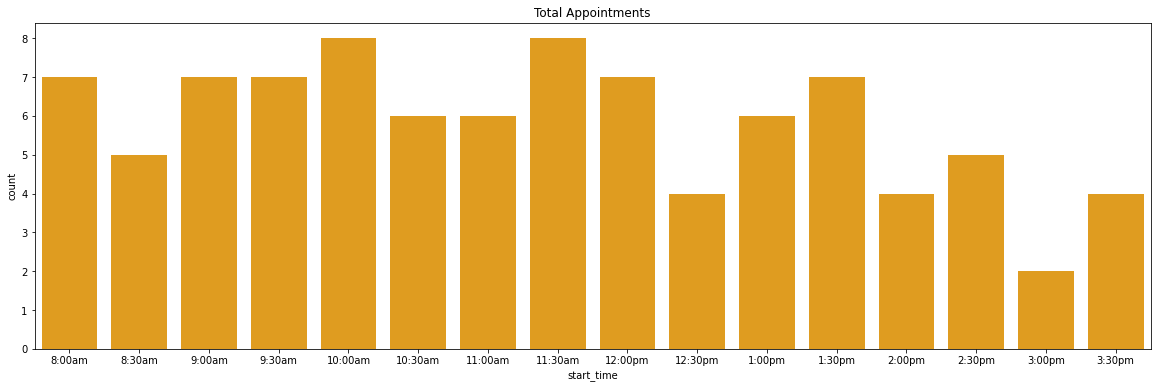

In [30]:
# Plot Counts
fig = plt.figure()
fig = plt.figure(figsize=(20,6))
plt.ylabel('Number of Appointments')
plt.xlabel('Start Time')
plt.title('Total Appointments')
sns.countplot(x="start_time", color='orange',
              #hue="service", 
              data=apptplus)

<Figure size 432x288 with 0 Axes>

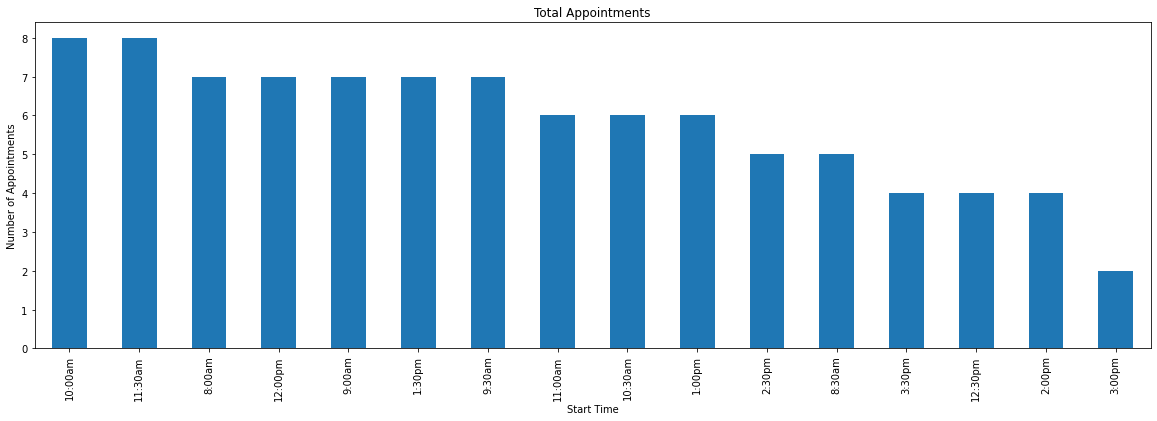

In [31]:
fig = plt.figure()
fig = plt.figure(figsize=(20,6))
plt.ylabel('Number of Appointments')
plt.xlabel('Start Time')
plt.title('Total Appointments')
apptplus['start_time'].value_counts().plot(kind='bar')

### Time Slots

In [32]:
list(apptplus.columns)

['account',
 'customer_name',
 'phone',
 'email',
 'expeditor',
 'appointment_date',
 'duration',
 'start_time',
 'service',
 'location',
 'status',
 'created_by',
 'internal_notes',
 'notes_to_customer',
 'customer_notes',
 'slots']

In [48]:
#volume reporting datafram
volumeflow = apptplus.drop(['account',
 'phone',
 'email',
 'status',
 'created_by'], axis=1)

#create slots columns
#volumeflow['slots'] = volumeflow['duration']

#clean up slots
#volumeflow.slots.replace("30 Minutes", 1, regex=True, inplace=True)

volumeflow.head()

,customer_name,expeditor,appointment_date,duration,start_time,service,location,internal_notes,notes_to_customer,customer_notes,slots
0,Carmen Napier,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Applying for a TSFE. must have ss card and pho...,NaN,NaN,30 minutes
1,Mitchell Greenblatt,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,TFSE,NaN,NaN,30 minutes
2,John Segarra,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,TFSE told Queens location told application id ...,TFSE told Queens location told application id,6/9/2021 TFSE told Queens location told applic...,30 minutes
3,RYAN FORBES,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,RESCHEDULED FROM JULY 12TH OK AS PER CATHERINE...,NaN,5/26/2021 applicant coming to taking fpf and e...,1 hour 30 minutes
4,CHARLES FRIEDMAN,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,Applicant must take the HIC Exam for applicati...,Applicant must take the HIC Exam for applicati...,NaN,1 hour 30 minutes


In [39]:
volumeflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_name      93 non-null     category      
 1   expeditor          93 non-null     category      
 2   appointment_date   93 non-null     datetime64[ns]
 3   duration           93 non-null     category      
 4   start_time         93 non-null     object        
 5   service            93 non-null     category      
 6   location           93 non-null     category      
 7   internal_notes     89 non-null     object        
 8   notes_to_customer  70 non-null     object        
 9   customer_notes     52 non-null     object        
 10  slots              93 non-null     object        
dtypes: category(5), datetime64[ns](1), object(5)
memory usage: 8.6+ KB


In [52]:
#clean up slots
volumeflow.slots.replace("^30 min.", 1, regex=True, inplace=True)
volumeflow.slots.replace("^1 hour$", 2, regex=True, inplace=True)
volumeflow.slots.replace("^1 hour 30.", 3, regex=True, inplace=True)
volumeflow.slots.replace("^2 hours$", 4, regex=True, inplace=True)
volumeflow.slots.replace("^2 hour 30.", 5, regex=True, inplace=True)
volumeflow.slots.replace("^3 hours$", 6, regex=True, inplace=True)
volumeflow.slots.replace("^3 hour 30.", 7, regex=True, inplace=True)
volumeflow.head()

,customer_name,expeditor,appointment_date,duration,start_time,service,location,internal_notes,notes_to_customer,customer_notes,slots
0,Carmen Napier,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,Applying for a TSFE. must have ss card and pho...,NaN,NaN,1
1,Mitchell Greenblatt,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,TFSE,NaN,NaN,1
2,John Segarra,Not Expeditor,2021-06-15,30 minutes,8:00am,Applying for License,Queens,TFSE told Queens location told application id ...,TFSE told Queens location told application id,6/9/2021 TFSE told Queens location told applic...,1
3,RYAN FORBES,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,RESCHEDULED FROM JULY 12TH OK AS PER CATHERINE...,NaN,5/26/2021 applicant coming to taking fpf and e...,3
4,CHARLES FRIEDMAN,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,Applicant must take the HIC Exam for applicati...,Applicant must take the HIC Exam for applicati...,NaN,3


In [53]:
# Unique Items
print("There are", volumeflow['slots'].nunique(), "versions of time blocks")
print("*"*80)
print(volumeflow.slots.unique())

There are 3 versions of time blocks
********************************************************************************
[1 3 2]


### Other code

In [35]:
# Exams not 1hr 30 mins
pull = apptplus[((apptplus['service'] == 'Exam')) & (apptplus['duration'] != '1 hour 30 minutes')]
print("There are", pull.shape[0],"results exams that are not 1hr 30 min")
print("*"*80)
pull

There are 0 results exams that are not 1hr 30 min
********************************************************************************


,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots


In [36]:
apptplus[((apptplus['service'] == 'Exam'))]

,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
3,New York City Department of Consumer Affairs,RYAN FORBES,347-681-1546,ryanforbes26@yahoo.com,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,No Call Back to Confirm,Candice,RESCHEDULED FROM JULY 12TH OK AS PER CATHERINE...,NaN,5/26/2021 applicant coming to taking fpf and e...,1 hour 30 minutes
4,New York City Department of Consumer Affairs,CHARLES FRIEDMAN,845-558-7705,Charles@cabgroups.com,Not Expeditor,2021-06-15,1 hour 30 minutes,8:00am,Exam,Manhattan Exam,Scheduled,Cherisse,Applicant must take the HIC Exam for applicati...,Applicant must take the HIC Exam for applicati...,NaN,1 hour 30 minutes
9,New York City Department of Consumer Affairs,Umair Nasir,7182606101,info@repairsidewalk.nyc,Not Expeditor,2021-06-15,1 hour 30 minutes,8:30am,Exam,Manhattan Exam,Confirmed,Candice,Exam for 1819-2021-AHIC,NaN,NaN,1 hour 30 minutes
16,New York City Department of Consumer Affairs,TERRENCE SOBERS,718-790-4338,sobersterrence@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,9:00am,Exam,Manhattan Exam,No Call Back to Confirm,Cassia,"NEW HIC APPLICANT, SUBMITTED APPLICATION ON MA...",PLEASE BRING VALID PHOTO ID,NaN,1 hour 30 minutes
22,New York City Department of Consumer Affairs,Charles Costa,516-567-8018,cc21966@yahoo.com,Not Expeditor,2021-06-15,1 hour 30 minutes,9:30am,Exam,Manhattan Exam,Scheduled,Audra,Applied Online - New HIC 731-2021-AHIC,Please bring valid Photo ID,3/9/2021 731-2021-AHIC,1 hour 30 minutes
30,New York City Department of Consumer Affairs,CARLOS BENAVICES,646-404-4898,CENTACC627@GMAIL.COM,Not Expeditor,2021-06-15,1 hour 30 minutes,10:00am,Exam,Manhattan Exam,Scheduled,Shawneke,841-2021-AHIC,Please remember to wear a cloth face covering ...,NaN,1 hour 30 minutes
31,New York City Department of Consumer Affairs,Palwinder Palwinder Singh,9177179113,none10@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,10:00am,Exam,Manhattan Exam,Scheduled,Andrea,2777-2021-AHIC,2777-2021-AHIC,6/10/2021 2777-2021-AHIC | 6/10/2021 2777-2021...,1 hour 30 minutes
37,New York City Department of Consumer Affairs,PATRICA HENRIQUEZ,347-234-3918,PATTY@GOPRRESTORATION.NET,Not Expeditor,2021-06-15,1 hour 30 minutes,10:30am,Exam,Manhattan Exam,Scheduled,Cherisse,Applicant must take the HIC exam for applicati...,Applicant must take the HIC exam for applicati...,NaN,1 hour 30 minutes
42,New York City Department of Consumer Affairs,Yudelka Mencia,347-854-6703,crestwoodcorp.r@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,11:00am,Exam,Manhattan Exam,Scheduled,Debbie,1980-2021-AHIC ONLINE APPLICATION ONLY FP,1980-2021-AHIC ONLINE APPLICATION ONLY FP,5/4/2021 1980-2021-AHIC ONLINE APPLICATION ONL...,1 hour 30 minutes
49,New York City Department of Consumer Affairs,Marco Reyes,347-892-5675,delacruzhandyman2018@gmail.com,Not Expeditor,2021-06-15,1 hour 30 minutes,11:30am,Exam,Manhattan Exam,Scheduled,Rashida,1949-2021-AHIC. Exam fee paid,NaN,NaN,1 hour 30 minutes


In [37]:
# 1hr Window Appointments
pull = apptplus[((apptplus['expeditor'] == 'Not Expeditor')) & (apptplus['duration'] == '1 hour')]
print("There are", pull.shape[0],"results for 1hr Window Appointments")
print("*"*80)
pull

There are 2 results for 1hr Window Appointments
********************************************************************************


,account,customer_name,phone,email,expeditor,appointment_date,duration,start_time,service,location,status,created_by,internal_notes,notes_to_customer,customer_notes,slots
14,New York City Department of Consumer Affairs,GEORGE VLAHOS,646-302-3563,gvlahos26@aol.com,Not Expeditor,2021-06-15,1 hour,9:00am,Applying for License,Queens,Confirmed,Cassia,APPLYING FOR 6 TFSE APPLICATIONS,PLEASE BRING ALL REQUIRED DOCUMENTS,NaN,1 hour
57,New York City Department of Consumer Affairs,Fefe Anggono,347-615-2003,Felincia_ang@yahoo.com,Not Expeditor,2021-06-15,1 hour,12:00pm,Applying for License,Queens,Confirmed,Debbie,Applying for TFSE 4 Application.,Applying for TFSE 4 Application.,6/9/2021 Applying for TFSE 4 Application.,1 hour
